# Fourth Data AnalysisProcess

In this notebook file, heatmap and some jointplots will be plotted

In [1]:
#Libraries are being imported
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import __version__ as matplotlibVersion
import seaborn as sns

In [2]:
#Settings for Graphic Libraries are being made
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
#Library versions are being printed
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlibVersion)
print('seaborn Version: ' + sns.__version__)

pandas Version: 1.5.2
matplotlib Version: 3.6.2
seaborn Version: 0.12.1


In [4]:
#A pandas dataframe named as dataFrame is being created by reading the data pkl file created last process
dataFrame = pd.read_pickle("../Data/DataAnalysis/FabricWaste.pkl")
dataFrame.head()

,ColorType,CustomerDefinedCategory,Maturity,Gender,ProductType,ProductTypeCategory,FabricType,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,SC,Greenish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,35,3,375,0.064198,0.014815,25,6
1,SC,Orangeish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.060386,0.007246,23,3
2,SC,Bluish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.077121,0.028278,29,11
3,SC,Bluish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.062802,0.019324,24,8
4,SC,Pinkish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.045894,0.007246,18,3


In [5]:
#Information of dataframe is being printed
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ColorType                186 non-null    object 
 1   CustomerDefinedCategory  186 non-null    object 
 2   Maturity                 186 non-null    object 
 3   Gender                   186 non-null    object 
 4   ProductType              186 non-null    object 
 5   ProductTypeCategory      186 non-null    object 
 6   FabricType               186 non-null    object 
 7   FabricCode               186 non-null    object 
 8   IsManualProcess          186 non-null    bool   
 9   Weight                   186 non-null    int64  
 10  Width                    186 non-null    int64  
 11  ProductPart              186 non-null    int64  
 12  NotchLayer               186 non-null    int64  
 13  NotchQuantity            186 non-null    int64  
 14  OrderQuantity            1

In [6]:
#Statistical information of dataframe is being printed
dataFrame.describe()

,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,165.241935,159.435484,4.801075,44.483871,2.467742,294.489247,0.047758,0.026811,13.908602,7.919355
std,36.999935,15.936653,2.289388,21.042615,0.792896,113.160409,0.028010,0.023099,8.328864,6.445527
min,125.000000,120.000000,2.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,150.000000,4.000000,31.000000,2.000000,206.250000,0.028916,0.011349,8.000000,4.000000
50%,172.500000,160.000000,4.000000,39.000000,3.000000,250.000000,0.041523,0.020425,12.000000,6.000000
75%,190.000000,171.500000,5.000000,58.000000,3.000000,380.000000,0.062802,0.035610,17.750000,10.000000
max,250.000000,180.000000,14.000000,111.000000,4.000000,640.000000,0.165803,0.165803,60.000000,42.000000


<AxesSubplot: >

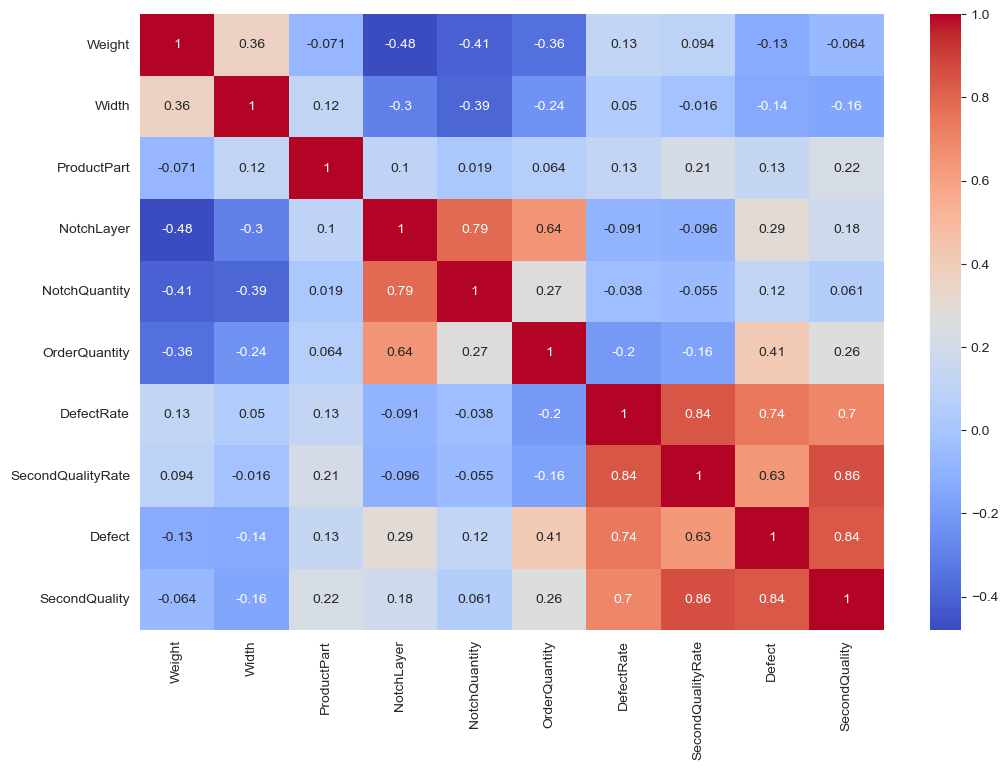

In [7]:
#Heatmap for numeric features is being plotted
#Jointplots will be plotted based on this heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(dataFrame.drop('IsManualProcess', axis = 1).corr(numeric_only = True), annot = True, cmap = 'coolwarm')

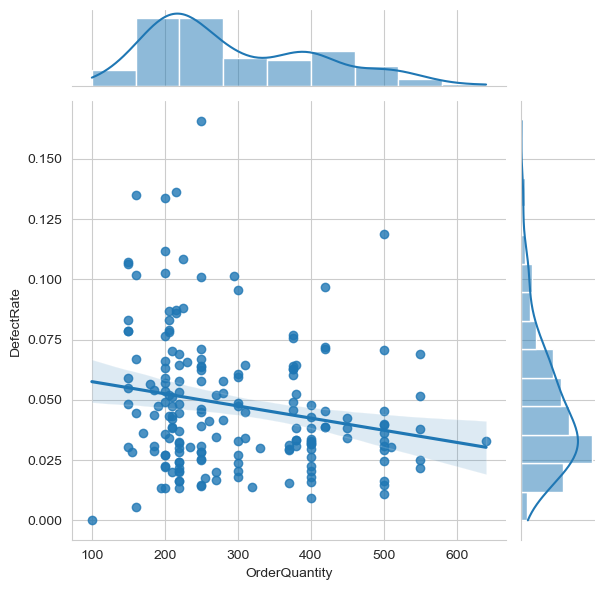

In [8]:
#Since there are comments to be made on it, jointplot for OrderQuantity and DefectRate features is being plotted
#This low negative correlation seems pretty interesting
#As mentioned in DataAnalysis02, Maybe when the OrderQuantity is high, fewer mistakes had made by employees over time
#as they produce more of the same product
#Maybe the relationship between them is due to a third reason,
#such as conditions of employees for bigger jobs or a longer deadline for work
sns.jointplot(x = 'OrderQuantity', y = 'DefectRate', data = dataFrame, kind = 'reg')

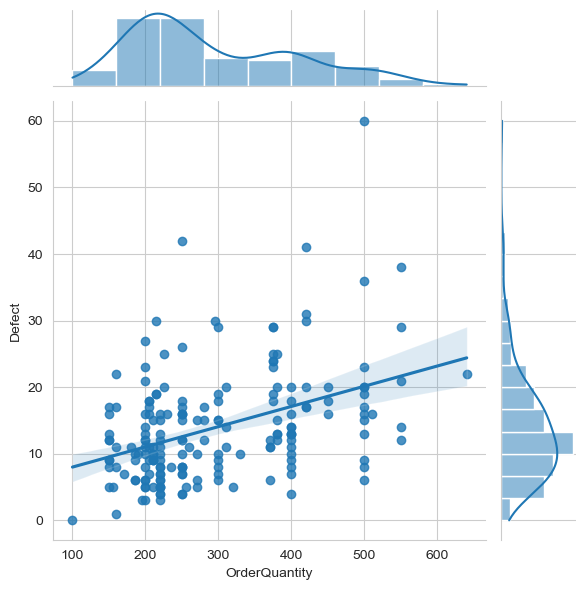

In [9]:
#Since there are comments to be made on it, jointplot for OrderQuantity and Defect features is being plotted
#Although the Defect value is calculated by multiplying the OrderQuantity value with the DefectRate value,
#lower than expected correlation between Defect and OrderQuantity can be explained by
#the negative correlation between OrderQuantity and DefectRate

#Increasing the OrderQuantity value increases the Defect value,
#while the decreasing DefectRate value due to the increasing OrderQuantity value decreases the Defect value
#this results in a decrease in the correlation
sns.jointplot(x = 'OrderQuantity', y = 'Defect', data = dataFrame, kind = 'reg')

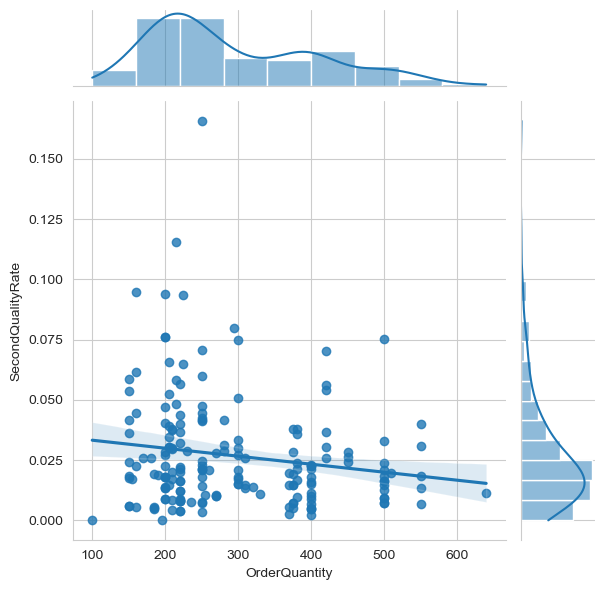

In [10]:
#Since there are comments to be made on it, jointplot for OrderQuantity and SecondQualityRate features is being plotted
#This low negative correlation seems pretty interesting
#As mentioned in before, Maybe when the OrderQuantity is high, fewer mistakes had made by employees over time
#as they produce more of the same product
#Maybe the relationship between them is due to a third reason,
#such as conditions of employees for bigger jobs or a longer deadline for work
sns.jointplot(x = 'OrderQuantity', y = 'SecondQualityRate', data = dataFrame, kind = 'reg')

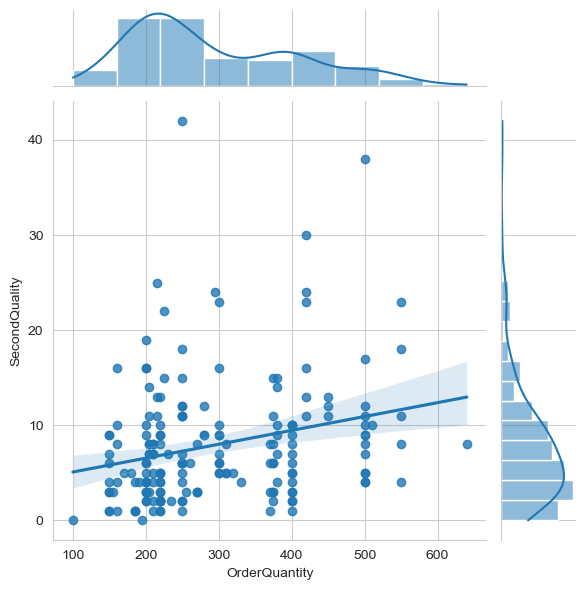

In [11]:
#Since there are comments to be made on it, jointplot for OrderQuantity and SecondQuality features is being plotted
#Although the SecondQuality value is calculated by multiplying the OrderQuantity value with the OrderQuantity value,
#lower than expected correlation between SecondQuality and OrderQuantity can be explained by
#the negative correlation between OrderQuantity and SecondQualityRate

#Increasing the OrderQuantity value increases the SecondQuality value,
#while the decreasing SecondQualityRate value due to the increasing OrderQuantity value decreases the SecondQuality value
#this results in a decrease in the correlation
sns.jointplot(x = 'OrderQuantity', y = 'SecondQuality', data = dataFrame, kind = 'reg')